In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
dataset = pd.read_csv('non_linear_classification_data.csv')
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,56,30795,1
1,25,91820,0
2,36,52194,0


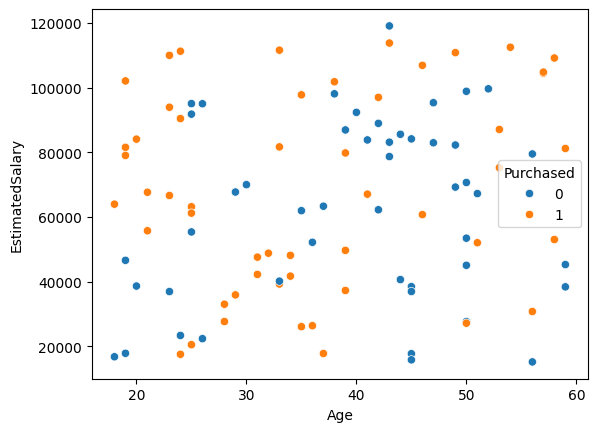

In [32]:
sns.scatterplot(x='Age' , y='EstimatedSalary',data=dataset , hue="Purchased")
plt.show()

In [33]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [34]:
x = dataset.iloc[: , :-1]
y = dataset['Purchased']


In [35]:
# ab is case me age ki value bht kam he or estimated sal bht ziada to hm scalling kare ge

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [37]:
sc.fit(x)

StandardScaler()

In [38]:
x = pd.DataFrame(sc.transform(x) , columns=x.columns)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size= 0.20 , random_state=42)

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)

DecisionTreeClassifier()

In [43]:
dt.score(x_test , y_test)

0.55

In [44]:
from sklearn.tree import plot_tree

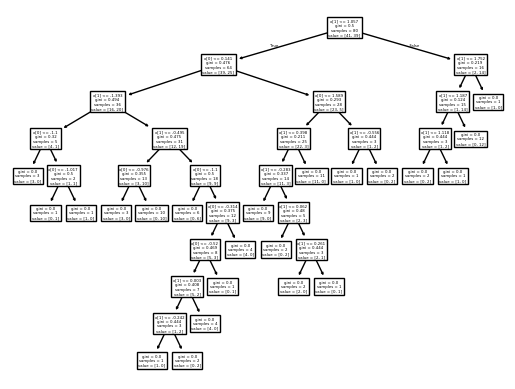

In [45]:
plot_tree(dt)
plt.show()

In [46]:
#using entropy

dt1 = DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [47]:
dt1.score(x_test , y_test)*100

55.00000000000001

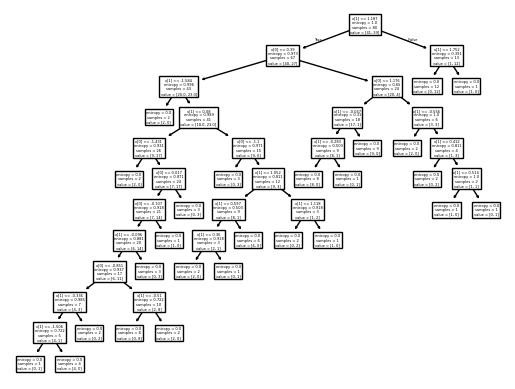

In [48]:
plot_tree(dt1)
plt.show()